In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Warm-up 1
- Use ```pivot_longer()``` and ```pivot_wider()``` to convert one table into the other.

In [3]:
(phone_nos1 <- tribble(
  ~name,             ~'home_phone',    ~'cell_phone',
  #-----------------|-----------------|------
  "John Smith",      "123-124-1111",  "121-121-3212",
  "Jane Doe",        "321-421-7777",  "431-456-1290",
  "Hadley Wickman",  "111-222-8888",  "121-111-9876",
))

(phone_nos2 <- tribble(
  ~name,             ~'line_type',    ~'phone_nos',
  #-----------------|-----------------|------
  "John Smith",      "home_phone",  "123-124-1111",
  "John Smith",      "cell_phone",  "121-121-3212",
  "Jane Doe",        "home_phone",  "321-421-7777",
  "Jane Doe",        "cell_phone",  "431-456-1290",
  "Hadley Wickman",  "home_phone",  "111-222-8888",
  "Hadley Wickman",  "cell_phone",  "121-111-9876",
))

name,home_phone,cell_phone
<chr>,<chr>,<chr>
John Smith,123-124-1111,121-121-3212
Jane Doe,321-421-7777,431-456-1290
Hadley Wickman,111-222-8888,121-111-9876


name,line_type,phone_nos
<chr>,<chr>,<chr>
John Smith,home_phone,123-124-1111
John Smith,cell_phone,121-121-3212
Jane Doe,home_phone,321-421-7777
Jane Doe,cell_phone,431-456-1290
Hadley Wickman,home_phone,111-222-8888
Hadley Wickman,cell_phone,121-111-9876


In [3]:
phone_nos1 %>%
    pivot_longer(c("home_phone", "cell_phone"), names_to = "line_type", values_to = "phone_nos")

name,line_type,phone_nos
<chr>,<chr>,<chr>
John Smith,home_phone,123-124-1111
John Smith,cell_phone,121-121-3212
Jane Doe,home_phone,321-421-7777
Jane Doe,cell_phone,431-456-1290
Hadley Wickman,home_phone,111-222-8888
Hadley Wickman,cell_phone,121-111-9876


In [5]:
phone_nos2 %>%
    pivot_wider(names_from = line_type, values_from = phone_nos)

name,home_phone,cell_phone
<chr>,<chr>,<chr>
John Smith,123-124-1111,121-121-3212
Jane Doe,321-421-7777,431-456-1290
Hadley Wickman,111-222-8888,121-111-9876


Warm-up 2
- The following is a 2-way frequency table describing patient data
- Use ggplot to make a bar graph of how many patients are in each medication group, each bar filled in by age status.
 * Hint: Remember to use ```stat = 'identity'``` to override the y-value of a ```geom_bar``` layer.

In [7]:
(patient_data <- tribble(
  ~medication,        ~'child',   ~'adult',
  #-----------------|----------|----------
  "placebo",         25,        28,
  "medication1",     14,        13,
  "medication2",     15,        16
))

medication,child,adult
<chr>,<dbl>,<dbl>
placebo,25,28
medication1,14,13
medication2,15,16


In [10]:
patient_data %>%
    pivot_longer(c("child", "adult"), names_to = "age_status", values_to = "frequency")

medication,age_status,frequency
<chr>,<chr>,<dbl>
placebo,child,25
placebo,adult,28
medication1,child,14
medication1,adult,13
medication2,child,15
medication2,adult,16


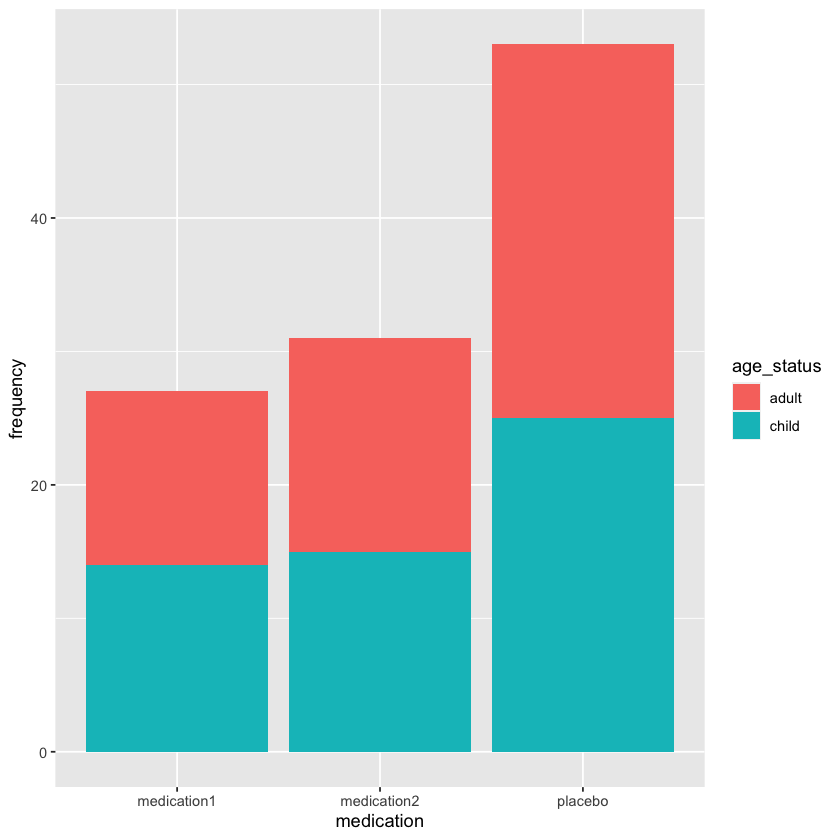

In [12]:
patient_data %>%
    pivot_longer(c("child", "adult"), names_to = "age_status", values_to = "frequency") %>%
    ggplot(aes(x = medication, y = frequency)) + 
    geom_bar(aes(fill = age_status), stat = "identity")

- Look at the ```who``` dataset
- Is this dataset tidy? Why or why not?
- Is there any redundant information?
- Hint: don't forget about using ```?```

In [16]:
who %>%
    select(-c("iso2", "iso3"))

country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,⋯,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Afghanistan,1980,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1981,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1982,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1983,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1984,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1985,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1986,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1987,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1988,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [14]:
?who

Goal: Graph the number of cases over time grouped by method of diagnosis for any given country

1. Move the variables from column headers to a new variable so that each row represents a case count and the type of case count
2. Separate the various variables in each string using the ```separate``` command
 - Hint: at some point you'll need to use the line
 
 ```mutate(variable_name = stringr::str_replace(variable_name, "newrel", "new_rel"))```
  
  which replaces each instance of "newrel" with "new_rel".
3. Create the desired graph

In [22]:
who %>%
    pivot_longer(new_sp_m014:newrel_f65, names_to = "some_variables", values_to = "cases") %>%
    mutate(some_variables = stringr::str_replace(some_variables, "newrel", "new_rel")) %>%
    separate(some_variables, into = c("new", "method", "gender_age"), sep = "_")

country,iso2,iso3,year,new,method,gender_age,cases
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
Afghanistan,AF,AFG,1980,new,sp,m014,NA
Afghanistan,AF,AFG,1980,new,sp,m1524,NA
Afghanistan,AF,AFG,1980,new,sp,m2534,NA
Afghanistan,AF,AFG,1980,new,sp,m3544,NA
Afghanistan,AF,AFG,1980,new,sp,m4554,NA
Afghanistan,AF,AFG,1980,new,sp,m5564,NA
Afghanistan,AF,AFG,1980,new,sp,m65,NA
Afghanistan,AF,AFG,1980,new,sp,f014,NA
Afghanistan,AF,AFG,1980,new,sp,f1524,NA


More questions:
- Why were there missing values in the original table? Where did they go? How can you recover them?
- What are some summary statistics you can perform with the tidy dataset that you could not do before?
- Do some exploratory data analysis if you have time!